# Compare pickle and segy

<br><br>Start by loading segy seismic volumes:


In [1]:
!pip install segyio

In [1]:
%run "seismic viewer code/all.py"

In [2]:
display(get_input)

SelectFilesButton(description='Select Segy file', icon='square-o', style=ButtonStyle(button_color='orange'))

In [67]:
seismic_segy = check_and_read_input(get_input.files[0])

 
Loaded file:  C:/Users/hildeha/Dev/Hackathon 2019/FORCE_2019/Poseidon3D_FullStack_SubSub.segy 

--- Inlines:
  --- Number of inlines:  126 
  --- Inline range:  2300 - 2425
 
--- Xlines:
  --- Number of xlines:  1001 
  --- Xline range:  2000 - 3000
 
--- Time/Depth samples:
  --- Number of Time/Depth samples:  1001 
  --- Time/Depth range:  0.0 - 4000.0 
  --- Time/Depth step:  4.0


## Plot both datatypes

In [68]:
%matplotlib inline

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot(line):
    plt.figure(figsize=(10,10))
    plt.imshow(line.T, cmap='seismic', vmin=-np.amax(line)*0.7,vmax=np.amax(line)*0.7)
    plt.colorbar()
    plt.show()

In [70]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

class Line(object):
    def __init__(self, line=None):
        self.line = line if line is not None else None
        self.scaler = widgets.FloatSlider(min=0, max=1, step=0.1, description='scaler: ') if line is not None else None
        
    def plot_line(self, scaler):
        plt.figure(figsize=(10,10))
        plt.imshow(self.line.T, cmap='seismic', vmin=-np.amax(self.line)*scaler,vmax=np.amax(self.line)*scaler)
        plt.colorbar()
        plt.show()
        
    def interactive_plot(self):
        interact(self.plot_line, scaler=self.scaler)

In [9]:
a1line = Line(aline)
a1line.interactive_plot()

NameError: name 'aline' is not defined

In [71]:
class Volume(object):
    def __init__(self, input_object=None):
        
        self.input_object = input_object if input_object is not None else None
        self.type = 'pickle'  if type(input_object) is np.ndarray else 'segy' if type(input_object) is segyio.segy.SegyFile else None
        self.volume = input_object if type(input_object) is np.ndarray else np.array(input_object.iline) if type(input_object) is segyio.segy.SegyFile else None
        self.ilines = np.arange(input_object.shape[0]) if type(input_object) is np.ndarray else input_object.ilines if type(input_object) is segyio.segy.SegyFile else None
        self.xlines = np.arange(input_object.shape[1]) if type(input_object) is np.ndarray else input_object.xlines if type(input_object) is segyio.segy.SegyFile else None
        self.samples = np.arange(input_object.shape[2]) if type(input_object) is np.ndarray else input_object.samples if type(input_object) is segyio.segy.SegyFile else None
        self.sample_rate = (input_object.samples[1]-input_object.samples[0]) if type(input_object) is segyio.segy.SegyFile else None
        
        self.tick = widgets.Checkbox(description='Show xline', disabled=False) 
        self.il_scroller = widgets.IntSlider(min=min(self.ilines), max=max(self.ilines), step=1, description='inline:', continuous_update=False) if input_object is not None else None
        self.xl_scroller = widgets.IntSlider(min=min(self.xlines), max=max(self.xlines), step=1, description='xline:', continuous_update=False) if input_object is not None else None
        self.scaler = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='scaler: ', continuous_update=True) if input_object is not None else None
        

        
        
    def plot_two(self, scaler, il_scroller, xl_scroller):

        
        fig, ax = plt.subplots(1,2,figsize=(25,20), sharey=True) 
        
        if self.type is 'segy':   
            iline = il_scroller - min(self.ilines)
            xline = xl_scroller - min(self.xlines)
            a = ax[0].imshow(self.input_object.iline[self.input_object.ilines[iline]].T, cmap='seismic', vmin=-np.amax(self.volume)*scaler,vmax=np.amax(self.volume)*scaler)
            ax[0].axvline(x=xline, ymin=min(np.arange(len(self.samples))), ymax=max(np.arange(len(self.samples))), c='yellow', lw=4) 
            ax[1].imshow(self.input_object.xline[self.input_object.xlines[xline]].T, cmap='seismic', vmin=-np.amax(self.volume)*scaler,vmax=np.amax(self.volume)*scaler)
            ax[1].axvline(x=iline, ymin=min(np.arange(len(self.samples))), ymax=max(np.arange(len(self.samples))), c='yellow', lw=4)             
            numy=9
            ax[0].set_yticks(np.ones(numy+1)*np.arange(numy+1)*int(len(segy_volume.samples)/numy))
            ax[0].set_yticklabels(segy_volume.samples[::int(len(segy_volume.samples)/numy)])
            ax[1].set_yticks(np.ones(numy+1)*np.arange(numy+1)*int(len(segy_volume.samples)/numy))
            ax[1].set_yticklabels(segy_volume.samples[::int(len(segy_volume.samples)/numy)])
            numx=6
            ax[1].set_xticks(np.ones(numx+1)*np.arange(numx+1)*int(len(segy_volume.ilines)/numx))
            ax[1].set_xticklabels(segy_volume.ilines[::int(len(segy_volume.ilines)/numx)])
            ax[0].set_xticks(np.ones(numx+1)*np.arange(numx+1)*int(len(segy_volume.xlines)/numx))
            ax[0].set_xticklabels(segy_volume.xlines[::int(len(segy_volume.xlines)/numx)])
        else: 
            iline = il_scroller
            xline = xl_scroller
            a = ax[0].imshow(self.volume[iline,:,:].T, cmap='seismic', vmin=-np.amax(self.volume)*scaler,vmax=np.amax(self.volume)*scaler)
            ax[0].axvline(x=xline, ymin=min(self.samples), ymax=max(self.samples), c='yellow', lw=4) 
            ax[1].imshow(self.volume[:,xline,:].T, cmap='seismic', vmin=-np.amax(self.volume)*scaler,vmax=np.amax(self.volume)*scaler)
            ax[1].axvline(x=iline, ymin=min(self.samples), ymax=max(self.samples), c='yellow', lw=4) 
        ax[0].set_title('inline {}'.format(il_scroller), fontsize=25)
        ax[1].set_title('xline {}'.format(xl_scroller), fontsize=25)
        
        fig.subplots_adjust(right=1.3)
        fig.colorbar(a)
        ax[1].yaxis.set_tick_params(which='both', labelbottom=True)
        plt.show()

#     def plot_xline_and_inline(self):
#         widget = interactive(self.plot_two, scaler=self.scaler, il_scroller=self.il_scroller, xl_scroller=self.xl_scroller)
#         controls = HBox(widget.children[:-1])
#         output = widget.children[3]
#         display(VBox([controls, output]))
#         return output

    
    def plot_xline_and_inline(self):
        interact(self.plot_two, scaler=self.scaler, il_scroller=self.il_scroller, xl_scroller=self.xl_scroller)



In [8]:
b1line = Line(bline)
b1line.interactive_plot()

NameError: name 'bline' is not defined

In [72]:
segy_volume = Volume(seismic_segy)

In [73]:
segy_volume.plot_xline_and_inline()

interactive(children=(FloatSlider(value=0.5, description='scaler: ', max=1.0), IntSlider(value=2300, continuou…

## FFT

In [44]:
from scipy import signal

In [84]:
import random

## matplotlib

In [60]:
import itertools
from sklearn.linear_model import LinearRegression

In [209]:
global xs
global ys
global i_pos
global x_pos

xs = []; ys = []; i_pos=[]; x_pos=[]

<IPython.core.display.Javascript object>


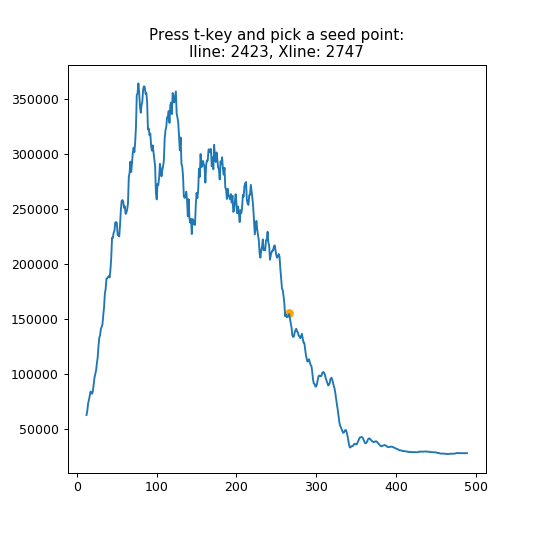

In [201]:

fig, ax = plt.subplots()
ax.plot(pd.Series(abs(np.fft.rfft(segy_volume.input_object.iline[rand_i][rand_x - min_x]))).rolling(24, center=True).mean())
ax.set_title('Press t-key and pick a seed point:\nIline: '+str(rand_i)+', Xline: '+str(rand_x))


temp_xs = []; temp_ys = []
def onclick(event):
    print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))
    
    temp_xs.append(event.xdata)
    temp_ys.append(event.ydata)
#     ax.scatter(event.xdata, event.ydata)
    ax.scatter(temp_xs, temp_ys, c='orange')
    
    
    if len(temp_xs) == 1:
        fig.canvas.mpl_disconnect(cid)
        

cid = fig.canvas.mpl_connect('button_press_event', onclick)

In [202]:
temp_xs

[265.3296515680129]

In [204]:
rand_i

2423

In [230]:
def plot(rand_x, rand_i, min_x):
    
    fig, ax = plt.subplots()
    ax.plot(pd.Series(abs(np.fft.rfft(segy_volume.input_object.iline[rand_i][rand_x - min_x]))).rolling(24, center=True).mean())
    ax.set_title('Press t-key and pick a seed point:\nIline: '+str(rand_i)+', Xline: '+str(rand_x))


    temp_xs = []; temp_ys = []
    def onclick(event):
        print('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
              ('double' if event.dblclick else 'single', event.button,
               event.x, event.y, event.xdata, event.ydata))

        temp_xs.append(event.xdata)
        temp_ys.append(event.ydata)
    #     ax.scatter(event.xdata, event.ydata)
        ax.scatter(temp_xs, temp_ys, c='orange')


        if len(temp_xs) == 1:
            fig.canvas.mpl_disconnect(cid)


    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    
    return temp_xs, temp_ys

In [231]:
rand_i = random.randint(min(segy_volume.input_object.ilines),max(segy_volume.input_object.ilines))
rand_x = random.randint(min(segy_volume.input_object.xlines),max(segy_volume.input_object.xlines))
min_x = min(segy_volume.input_object.xlines)

<IPython.core.display.Javascript object>


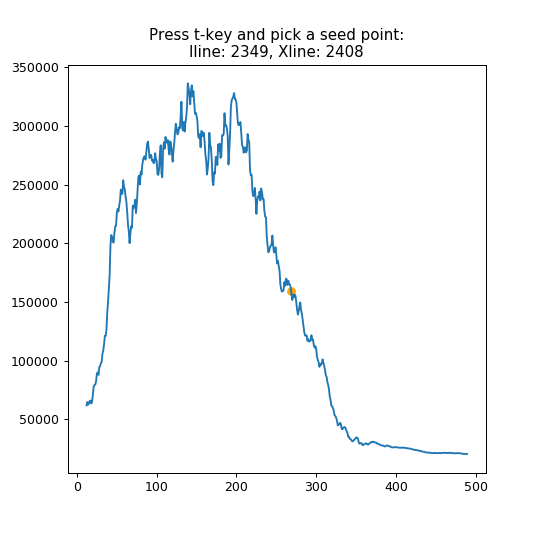

In [232]:
tx, ty = plot(rand_x, rand_i, min_x)

In [226]:
tx

[251.22481285833544]

In [227]:
ty

[171627.68914016322]

In [228]:
rand_i

2410

In [229]:
rand_x

2600

In [238]:

from IPython.display import display
button = widgets.Button(description="Click Me!")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    with output:
        x, y = plot(rand_x, rand_i, min_x)
        
    return x, y

button.on_click(on_button_clicked)

Button(description='Click Me!', style=ButtonStyle())

Output()

In [237]:
button.

NameError: name 'x' is not defined